In [5]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)
print(path)

/root/.fastai/data/oxford-iiit-pet


In [2]:
# delete directory if it exists
# if os.path.exists(path):
#     shutil.rmtree(path)

In [6]:

additional_images = Path('images')
ims = get_image_files(additional_images)
for i, img in enumerate(ims):
    category = img.parent.name
    try:
        im = PILImage.create(img)
    except:
        print(f"Failed to open {img}")
        continue

    shutil.copy(src=img, dst=path/'images'/f"{category}_{i}.jpg")

failed = verify_images(path/'images')
print(f"Failed images: {failed}")
failed.map(Path.unlink)


Failed to open images/Afghan Hound/28e717e7-a443-4dad-bc5a-f5b6d32b8285.jpg
Failed to open images/Afghan Hound/798e6cdc-dedf-4d30-b3e1-289541f022b5.jpg
Failed to open images/Afghan Hound/94b3e498-766e-4848-a319-7ae17e0c5b13.jpg
Failed to open images/Afghan Hound/95ba6a0e-bf22-45a6-bf08-b75f469b91dd.jpg
Failed to open images/Akita/6126d58d-e6bb-4e7d-9c8d-e1c01d6e6b80.jpg
Failed to open images/Akita/615ac145-cb00-4adc-95be-75d764df7be6.jpg
Failed to open images/Akita/621ef017-cd40-4d14-84af-29c712069913.jpg
Failed to open images/Akita/628c99d3-f29d-48b6-a1f7-1c92f066166e.jpg
Failed to open images/Akita/633c3f90-81f9-4040-98df-baf86399a34a.jpg
Failed to open images/Alapaha Blue Blood Bulldog/6d4f1985-833f-4046-a1da-346306a4d59a.jpg
Failed to open images/Alapaha Blue Blood Bulldog/6f563896-579a-460b-94a2-4a47132bc870.jpg
Failed to open images/Alapaha Blue Blood Bulldog/6fde7e07-3903-48c6-b785-7f6f5b67bf3f.jpg
Failed to open images/Alapaha Blue Blood Bulldog/730003f8-8a8e-415e-8284-e646ec97

(#0) []

In [7]:
import torch; print(torch.cuda.get_device_name(0))

NVIDIA GeForce RTX 4070 Ti


In [8]:

dls = ImageDataLoaders.from_name_re(
    path, 
    get_image_files(path/'images'), 
    pat='(.+)_\d+.jpg', 
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    # item_tfms=Resize(460), 
    batch_tfms=aug_transforms(size=224, min_scale=0.75))


In [9]:

learn = vision_learner(
    dls, 
    models.resnet50, 
    metrics=accuracy)

print(learn.dls.vocab)


['Abyssinian', 'Affenpinscher', 'Afghan Hound', 'Africanis', 'Airedale Terrier', 'Akbash', 'Akita', 'Aksaray Malaklisi', 'Alano Español', 'Alapaha Blue Blood Bulldog', 'Alaskan Husky', 'Alaskan Klee Kai', 'Alaskan Malamute', 'Alaskan Malamutes', 'Alopekis', 'Alpine Dachsbracke', 'American Bulldog', 'American Bully', 'American Cocker Spaniel', 'American English Coonhound', 'American Eskimo Dog', 'American Foxhound', 'American Hairless Terrier', 'American Leopard Hound', 'American Pit Bull Terrier', 'American Staffordshire Terrier', 'American Water Spaniel', 'Anglo-Français de Petite Vénerie', 'Appenzeller Sennenhund', 'Argentine Pila', 'Ariège Pointer', 'Ariégeois', 'Armant', 'Armenian Gampr', 'Artois Hound', 'Australian Cattle Dog', 'Australian Kelpie', 'Australian Shepherd', 'Australian Silky Terrier', 'Australian Stumpy Tail Cattle Dog', 'Australian Terrier', 'Austrian Black Hound', 'Austrian Pinscher', 'Austrian Tan Hound', 'Azawakh', 'Bakharwal', 'Banjara Hound', 'Bankhar Dog', 'Ba

/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **to

SuggestedLRs(slide=3.630780702224001e-05, valley=0.0006918309954926372)

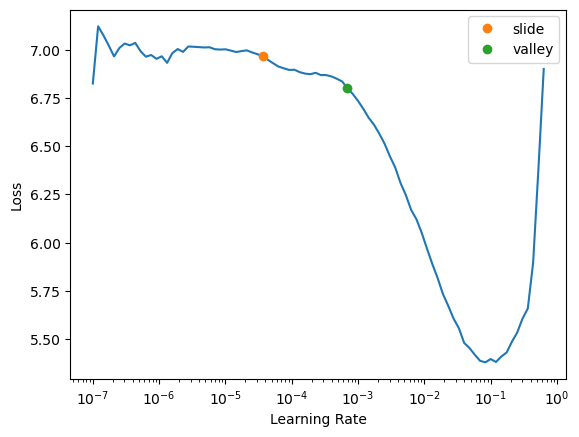

In [10]:

learn.lr_find(suggest_funcs=(slide, valley))


[I 2024-09-06 18:13:01,027] A new study created in RDB with name: Pet Classification - 1


Trial parameters: {'img_size': 384, 'model': 'resnet18', 'resize_method': 'ResizeSquish', 'batch_transforms': True, 'lr': 2.272818485909338e-05, 'dropout': 0.3047856845252957, 'epochs': 7, 'weight_decay': 0.007658355142079017, 'batch_size': 8, 'optimizer': 'Adam'}


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


[I 2024-09-06 18:19:09,308] Trial 0 finished with value: 0.0 and parameters: {'img_size': 384, 'model': 'resnet18', 'resize_method': 'ResizeSquish', 'batch_transforms': True, 'lr': 2.272818485909338e-05, 'dropout': 0.3047856845252957, 'epochs': 7, 'weight_decay': 0.007658355142079017, 'batch_size': 8, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.0.


Validation failed: Exception occured in `EarlyStoppingCallback` when calling event `after_epoch`:
	list index out of range
Trial parameters: {'img_size': 384, 'model': 'convnext_tiny', 'resize_method': 'ResizeSquish', 'batch_transforms': True, 'lr': 0.09604108278783567, 'dropout': 0.1453006404431691, 'epochs': 9, 'weight_decay': 0.015550685674990747, 'batch_size': 16, 'optimizer': 'Adam'}


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

[W 2024-09-06 18:25:04,904] Trial 1 failed with parameters: {'img_size': 384, 'model': 'convnext_tiny', 'resize_method': 'ResizeSquish', 'batch_transforms': True, 'lr': 0.09604108278783567, 'dropout': 0.1453006404431691, 'epochs': 9, 'weight_decay': 0.015550685674990747, 'batch_size': 16, 'optimizer': 'Adam'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/opt/miniconda3/envs/work/lib/python3.11/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_2691/1912200357.py", line 99, in objective
    learn.fit(epochs, lr)
  File "/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/learner.py", line 266, in fit
    self._with_events(self._do_fit, 'fit', CancelFitException, self._end_cleanup)
  File "/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/learner.py", line 201, in _with_events
    try: self(f'before_{event_type}

KeyboardInterrupt: 

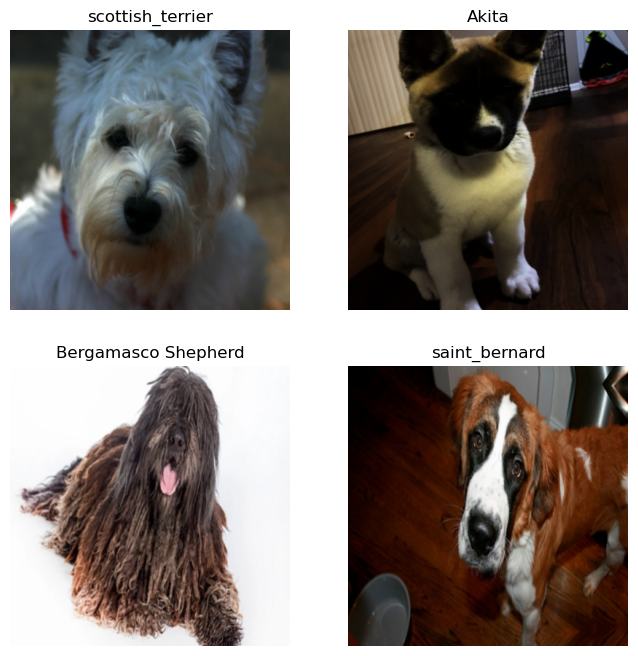

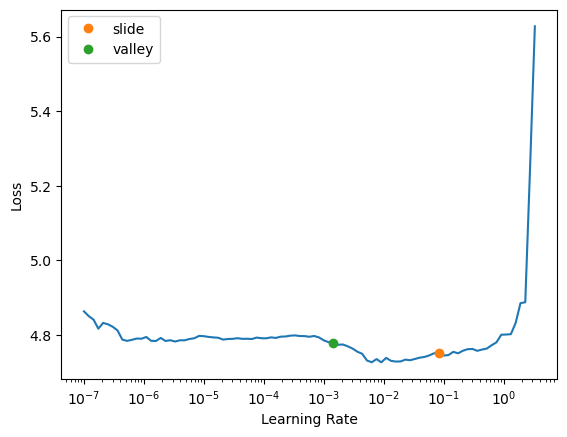

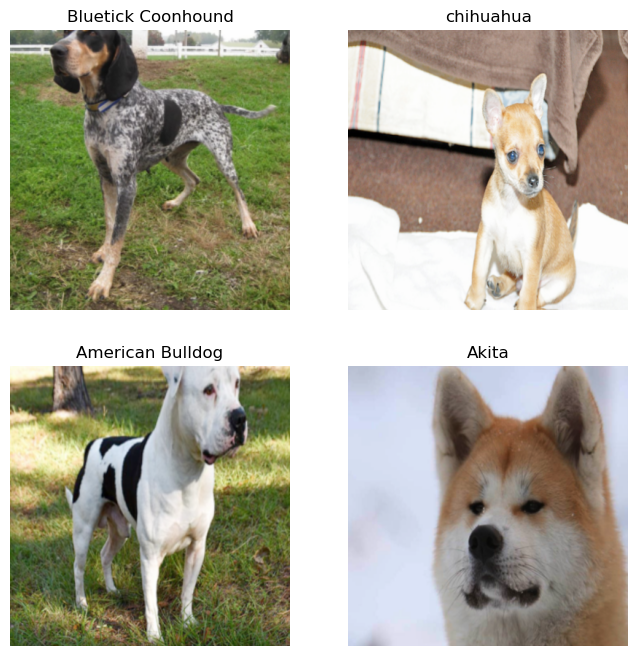

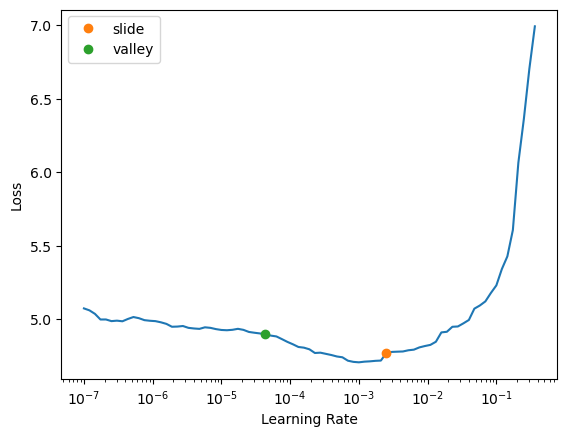

In [7]:
import optuna
from fastai.vision.all import *
import timm
from fastai.metrics import accuracy

def objective(trial):
    # Define hyperparameters to search
    # img_size = trial.suggest_categorical('img_size', [224, 256, 384])
    img_size = trial.suggest_categorical('img_size', [224, 256, 384, 512])
    # models = ['convnext_tiny', 'resnet50', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3']
    # models = ['convnext_tiny','convnext_large', 'resnet50', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3']
    models = ['convnext_tiny','resnet18']
    selected_model = trial.suggest_categorical('model', models)
    resize_method = trial.suggest_categorical('resize_method', ['Resize', 'RandomResizedCrop', 'ResizeSquish', 'ResizeCrop'])
    batch_transforms = trial.suggest_categorical('batch_transforms', [True])
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    dropout = trial.suggest_float('dropout', 0.1, 0.4)
    epochs = trial.suggest_int('epochs', 3, 10)
    weight_decay = trial.suggest_float('weight_decay', 0.002, 0.03, log=True)
    batch_size = trial.suggest_categorical('batch_size', [8, 16])
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam'])
    
    # Print the parameters for this trial
    print(f"Trial parameters: {trial.params}")
    
    # Define transformations based on suggested hyperparameters
    if resize_method == 'Resize':
        item_tfms = [Resize(img_size)]
    elif resize_method == 'RandomResizedCrop':
        item_tfms = [RandomResizedCrop(img_size, min_scale=0.9)]
    elif resize_method == 'ResizeSquish':
        item_tfms = [Resize(img_size, method='squish')]
    else:
        item_tfms = [Resize(img_size, method='crop')]
    
    batch_tfms = [
        *aug_transforms(  # Apply augmentations cautiously
            size=img_size,
            flip_vert=False,  # Avoid flipping vertically, important for medical data
            max_rotate=30,    # Limit rotations to ±10 degrees
            max_zoom=1.5,     # Slight zooming
            max_lighting=0.4, # Light contrast/brightness adjustment
            p_affine=0.5,     # Probability of affine transform
            p_lighting=0.3    # Probability of lighting transform
        ),
        Normalize.from_stats(*imagenet_stats)  # Normalize based on ImageNet mean/std
    ] if batch_transforms else [Normalize.from_stats(*imagenet_stats)]

    # Create DataLoaders
    dls = ImageDataLoaders.from_name_re(
        path, 
        get_image_files(path/'images'), 
        pat='(.+)_\d+.jpg', 
        item_tfms=item_tfms,
        batch_tfms=batch_tfms,
        bs=batch_size,
        shuffle_train=True)  # Shuffle the training data

    # Check if the DataLoader is loaded correctly
    dls.show_batch(max_n=4, figsize=(8, 8))

    the_model = timm.create_model(selected_model, pretrained=True, num_classes=dls.c)
    # Define the model with dropout
    def create_model(the_model=the_model, dropout=0.5):
        # Get the number of features from the classifier layer
        num_ftrs = the_model.get_classifier().in_features
        
        # Replace the classifier with dropout and a linear layer
        # The classifier layer is replaced regardless of its internal name
        the_model.reset_classifier(num_classes=dls.c)  # Resets the classifier dynamically
        the_model.classifier = nn.Sequential(
            nn.Dropout(p=dropout),  # Add dropout with the rate defined in your hyperparameter search
            nn.Linear(num_ftrs, dls.c)
        )
        
        return the_model
    
    # Create the learner
    patience = 3
    learn = Learner(
        dls, 
        create_model(the_model, dropout), 
        metrics=accuracy,
        wd=weight_decay,
        cbs=[EarlyStoppingCallback(monitor='accuracy', patience=patience)]
        ).to_bf16()
    
    learn.lr_find(suggest_funcs=(slide, valley))
    
    # Choose optimizer
    if optimizer_name == 'Adam':
        learn.opt_func = Adam
    elif optimizer_name == 'SGD':
        learn.opt_func = SGD
    elif optimizer_name == 'RMSprop':
        learn.opt_func = RMSProp
    
    # Train the model
    learn.fit(epochs, lr)
    
    # Initialize accuracy
    accuracy_result = 0.0
 
    # Evaluate the model
    try:
        # Evaluate the model
        validation_results = learn.validate()
        if validation_results and len(validation_results) > 1:
            accuracy_result = validation_results[1]
    except Exception as e:
        print(f"Validation failed: {e}")
        accuracy_result = 0.0  # Default value if validation fails
 
    return accuracy_result

# Create a study and optimize the objective function
study = optuna.create_study(
    storage="sqlite:///db.sqlite3",
    direction='maximize',
    study_name='Pet Classification - 1')
study.optimize(objective, n_trials=50)

# Print the best hyperparameters
print(study.best_params)

/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site

/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site

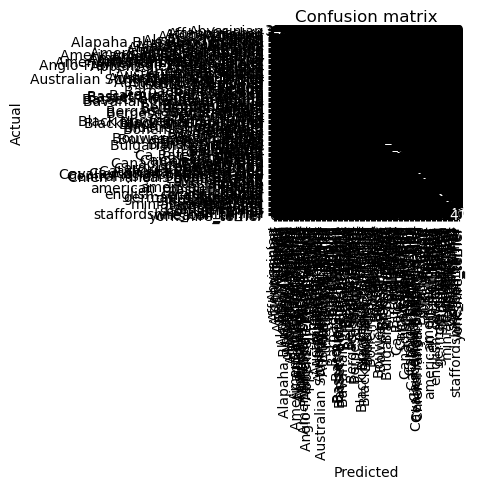

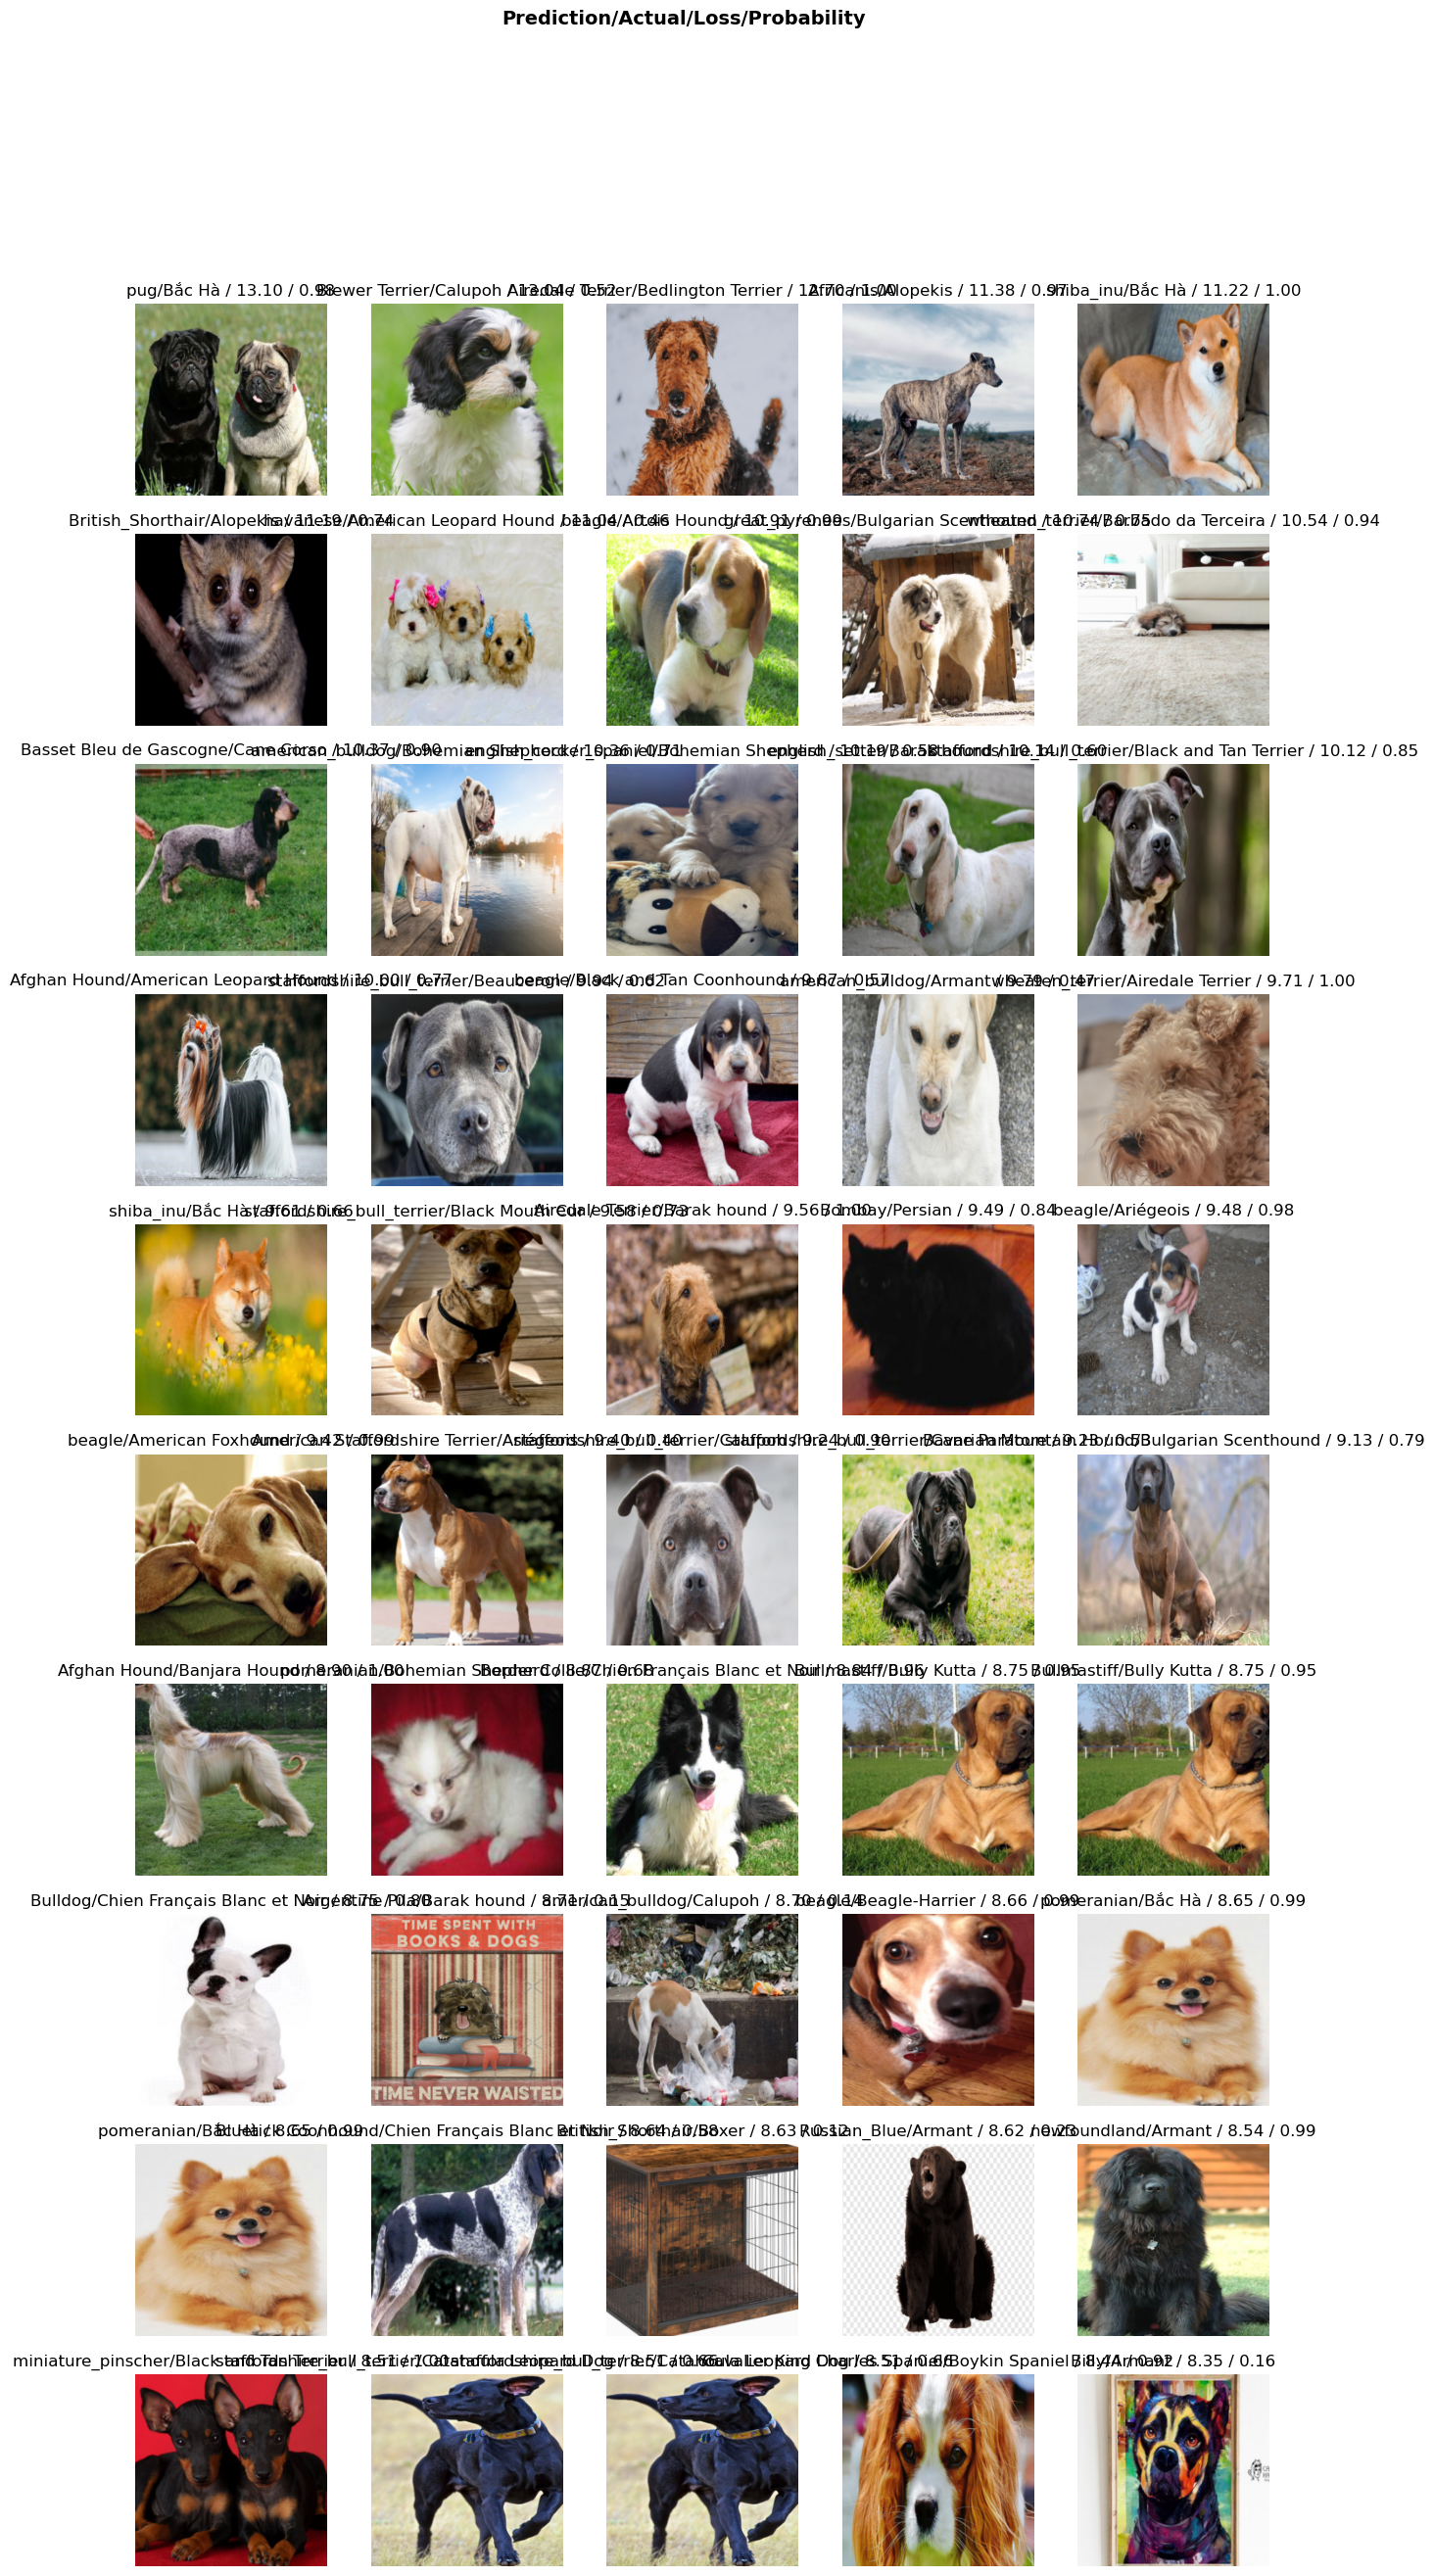

In [11]:

learn.fine_tune(1)
learn.path = Path('.')
learn.export()


/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site

/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/work/lib/python3.11/site

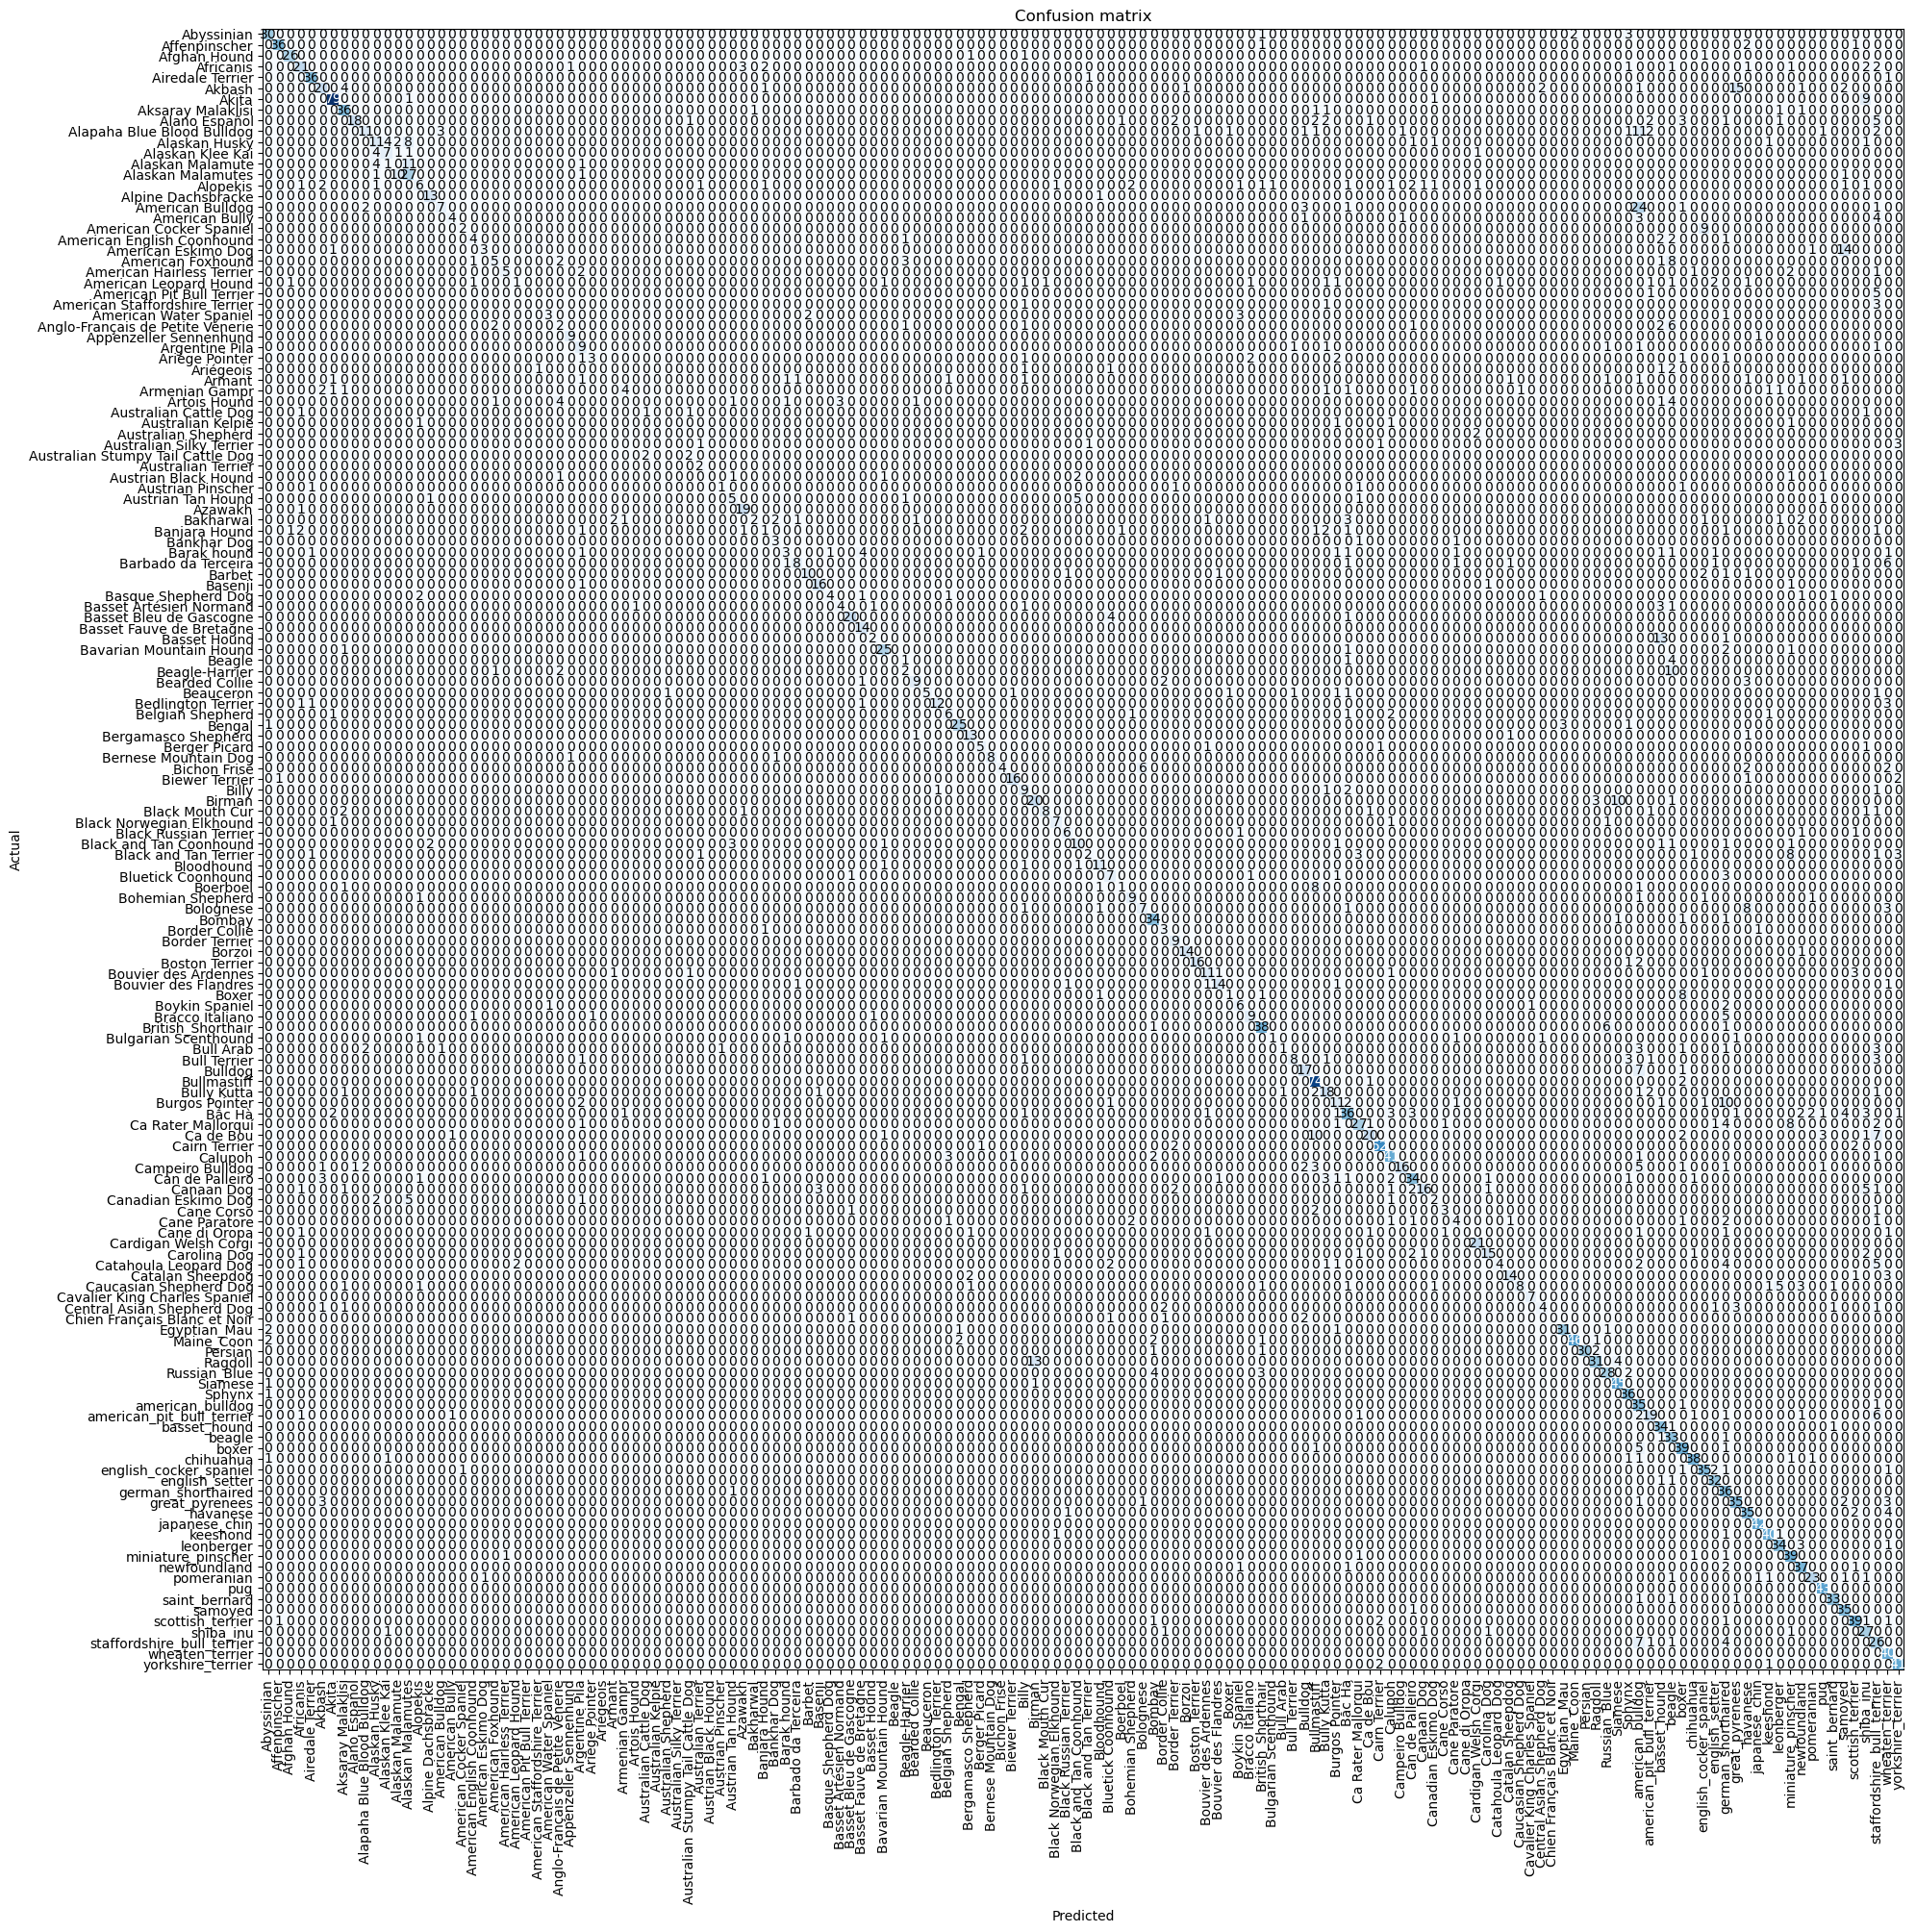

In [12]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(20, 20))


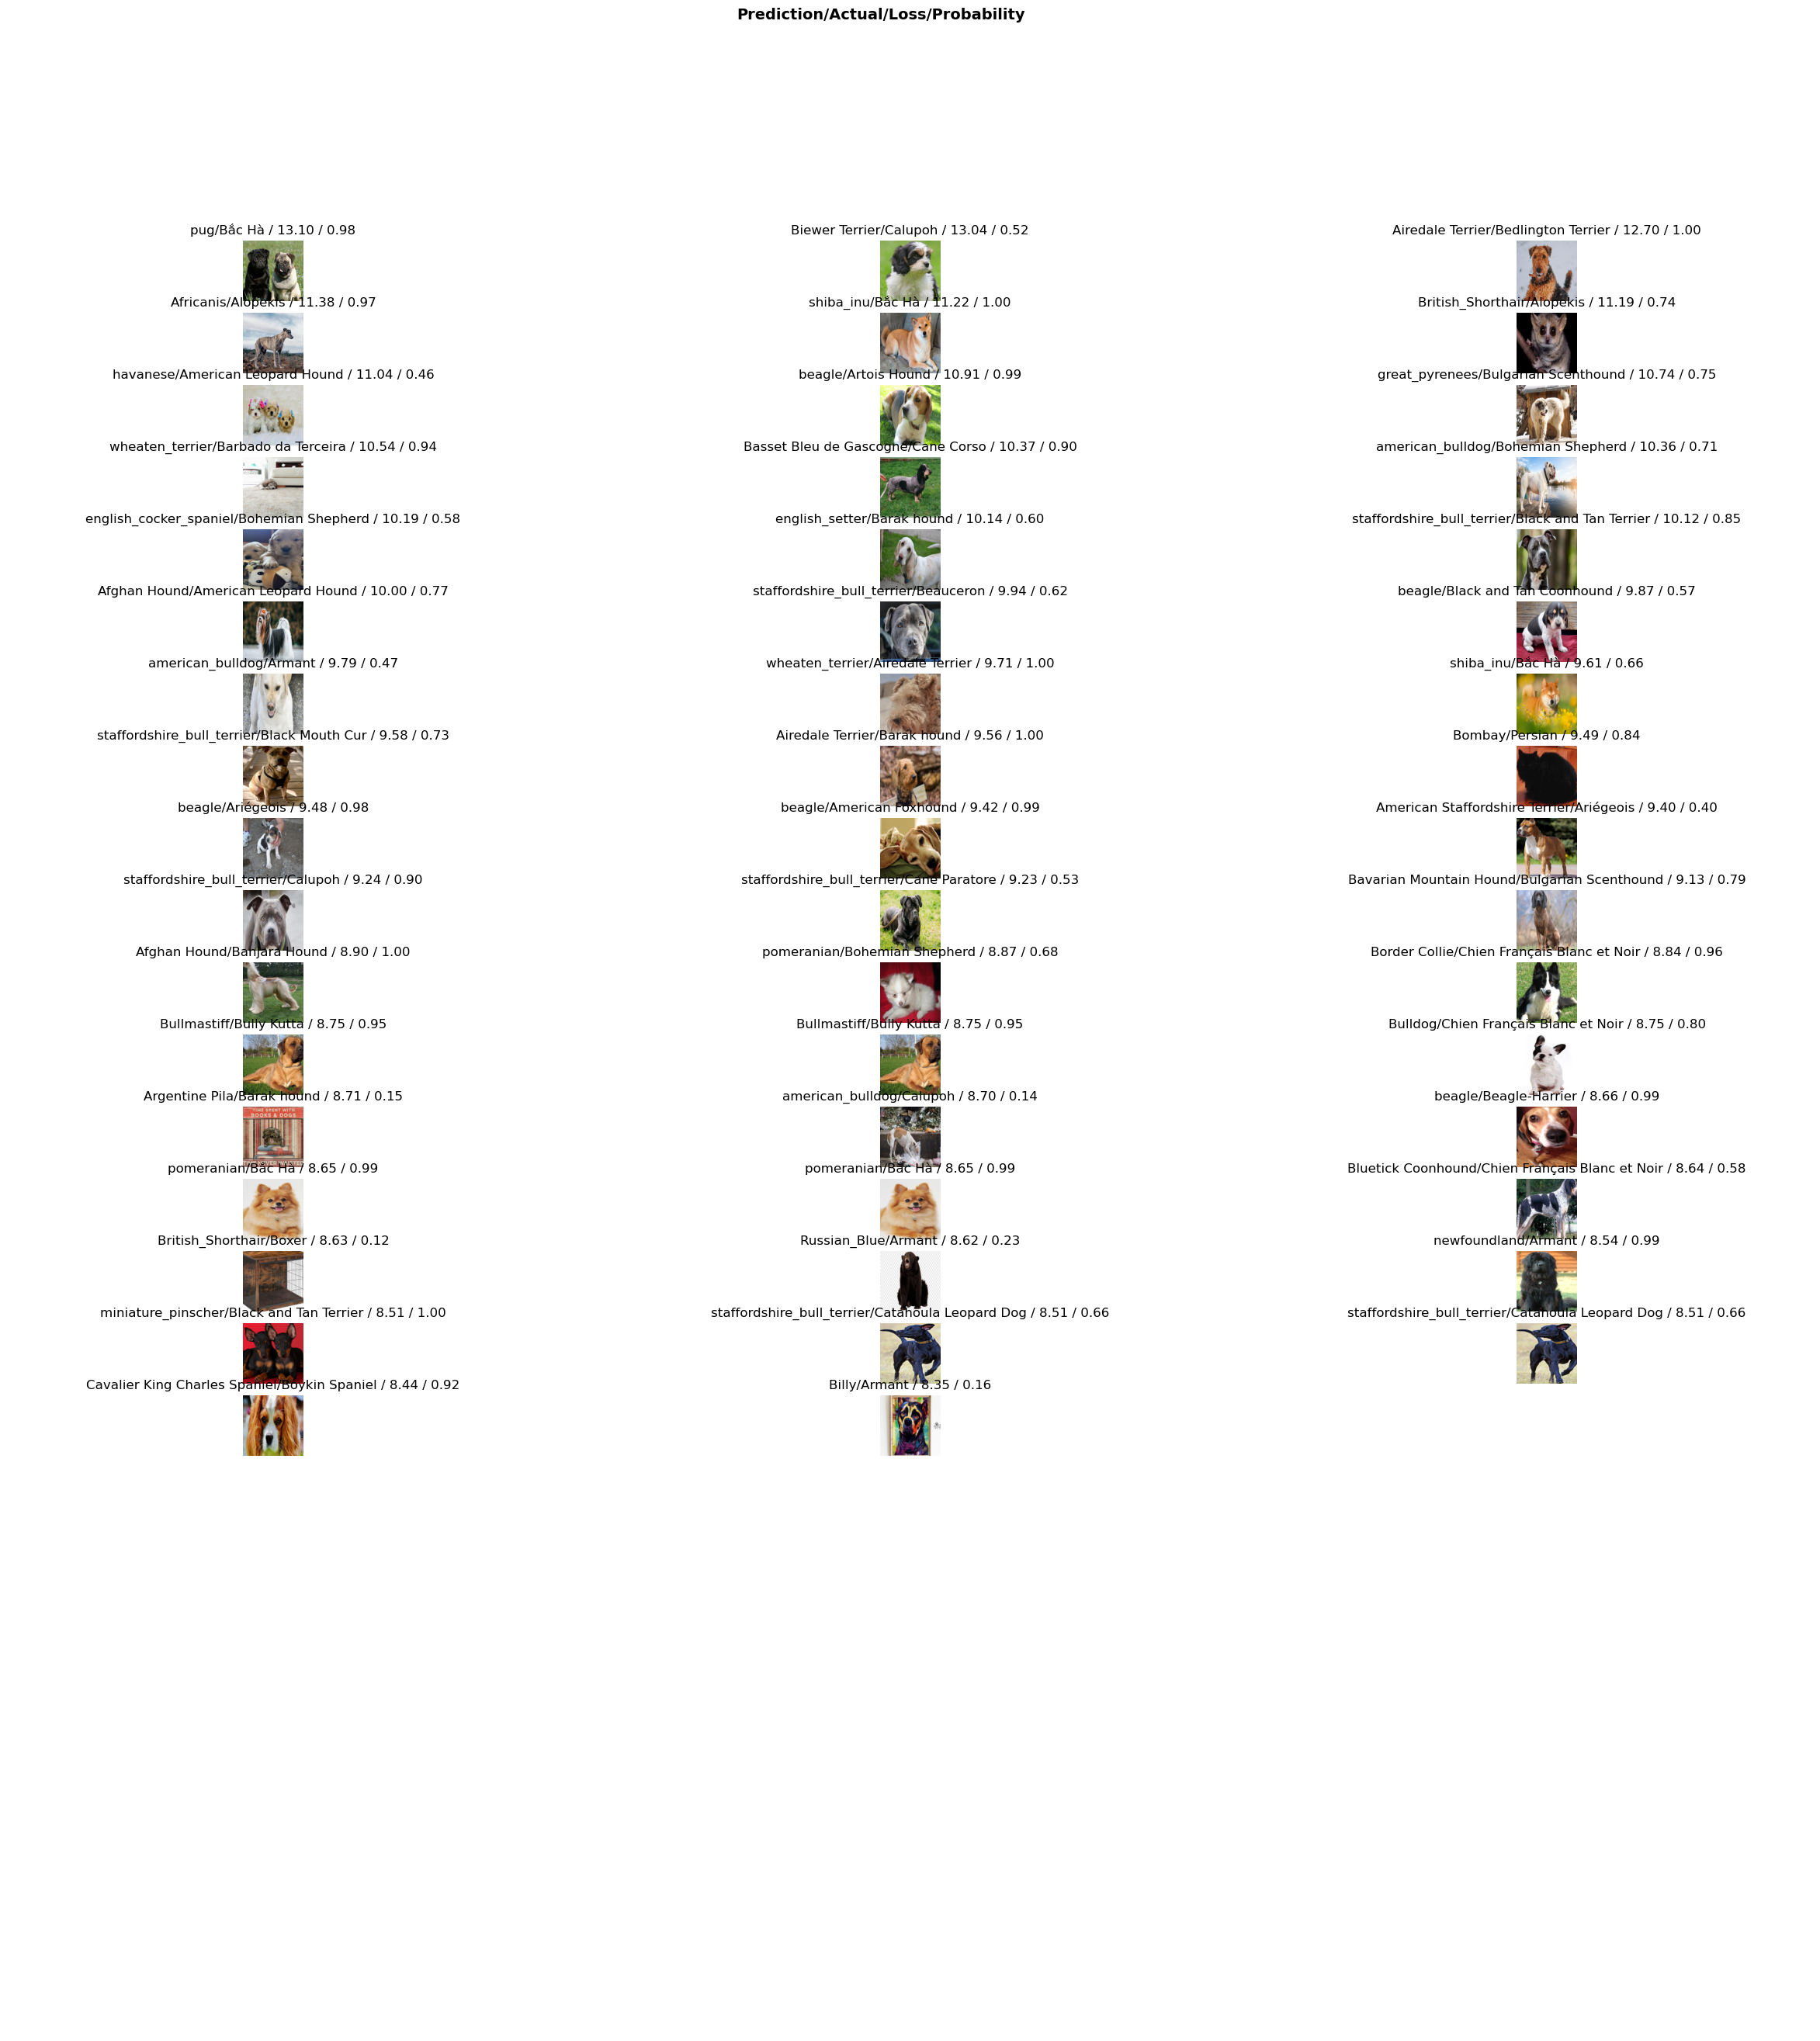

In [17]:

interp.plot_top_losses(50, nrows=25, ncols=3, figsize=(30, 30))